In [1]:
# Importing the standard Python packages
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Scenario Discovery

In [2]:
# Loading in the results from the experiments needed for the scenario discovery
from ema_workbench import load_results

experiments, outcomes = load_results('5000 scenarios policy0.tar.gz')

In [3]:
# Loading in the necessary modules for EMA Workbench
from __future__ import (unicode_literals, print_function, absolute_import,
                        division)

from ema_workbench import (Model, MultiprocessingEvaluator, Policy, Scenario)

from ema_workbench.em_framework.evaluators import perform_experiments
from ema_workbench.em_framework.samplers import sample_uncertainties
from ema_workbench.util import ema_logging
import time
from problem_formulation import get_model_for_problem_formulation

# Loading in the right problem formulation, problem formulation id 1 is the problem formulation with 3 objectives
if __name__ == '__main__':
    ema_logging.log_to_stderr(ema_logging.INFO)

    dike_model = get_model_for_problem_formulation(1)

[MainProcess/INFO] model initialized


In [4]:
# Drop the levers from the experiments array to just keep the needed information
import numpy.lib.recfunctions as rf

results = experiments, outcomes
lever_names = [l.name for l in dike_model.levers]
experiments = rf.drop_fields(experiments, drop_names=lever_names+['policy'], 
                             asrecarray=True)

## PRIM Analysis: Expected Number of Deaths

In [68]:
# PRIM analysis for the 'Expected Number of Deaths'
# Importing the PRIM analysis included in EMA workbench
from ema_workbench.analysis import prim

# Specifying the experiments and outcome
# For the outcome 'Expected Number of Deaths' the threshold is set to keep 30% of the points as cases of interest
x = experiments
y = (outcomes['Expected Number of Deaths'] <= 0.35).astype(int)

# Executing the PRIM analysis with threshold=0.8, which stands for the minimum coverage treshold that a box should meet
prim_alg = prim.Prim(x,y, threshold=0.8)
box_deaths = prim_alg.find_box()

[MainProcess/INFO] 5000 points remaining, containing 1495 cases of interest
[MainProcess/INFO] mean: 1.0, mass: 0.1394, coverage: 0.4662207357859532, density: 1.0 restricted_dimensions: 5


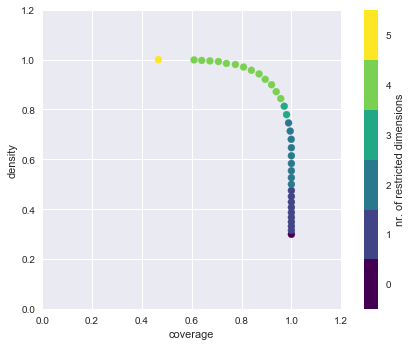

In [69]:
# Creating the trade-off visualisation
box_deaths.show_tradeoff()
plt.show()

In [75]:
# Inspecting the selected box for a coverage and density above 80%
box_deaths.inspect(20)

coverage    0.971237
density      0.81299
mass          0.3572
mean         0.81299
res dim            3
Name: 20, dtype: object

             box 20                                     
                min       max                  qp values
A.1_pfail  0.401738  0.999834  [2.1541365625485032e-174]
A.3_pfail  0.371371  0.999819  [1.1235263861418036e-146]
A.5_pfail  0.054831  0.999838   [0.00013269783188734192]



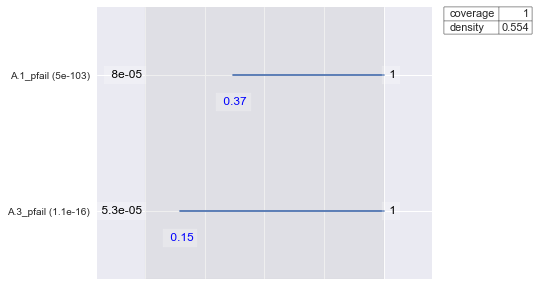

In [76]:
# Inspecting the selected box for a coverage and density above 80% - graph
box_deaths_graph = box_deaths.inspect(12, style='graph')
box_deaths_graph.set_size_inches(6,5)
plt.show()

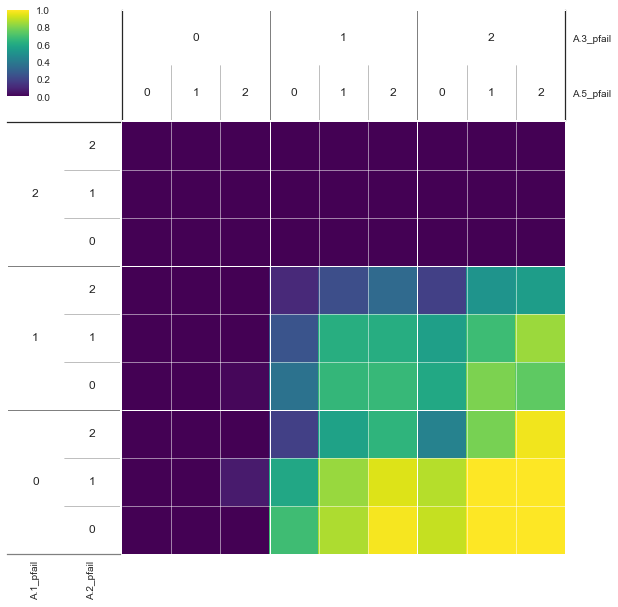

In [77]:
# Using dimensional stacking to check if the results of the scenario discovery give the same results
# The number of levels can be set on 2, since there are only 4 uncertainties that should be shown
from ema_workbench.analysis import dimensional_stacking

dimensional_stacking.create_pivot_plot(x,y, nr_levels=2) 
plt.show()

## PRIM Analysis: Expected Annual Damage

In [91]:
# PRIM analysis for the 'Expected Annual Damage'
# Importing the PRIM analysis included in EMA workbench
from ema_workbench.analysis import prim

# Specifying the experiments and outcome
# For the outcome 'Expected Annual Damage' the threshold is set to keep 30% of the points as cases of interest
x = experiments
y = (outcomes['Expected Annual Damage'] <= 300000000).astype(int)

# Executing the PRIM analysis with treshold=0.8, which stands for the minimum coverage threshold that a box should meet
prim_alg = prim.Prim(x,y, threshold=0.8)
box_damage = prim_alg.find_box()

[MainProcess/INFO] 5000 points remaining, containing 1568 cases of interest
[MainProcess/INFO] mean: 1.0, mass: 0.1406, coverage: 0.44834183673469385, density: 1.0 restricted_dimensions: 4


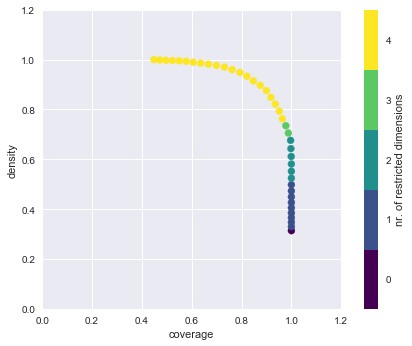

In [92]:
# Creating the trade-off visualisation
box_damage.show_tradeoff()
plt.show()

In [93]:
# Inspecting the selected box for a coverage and density above 80%
box_damage.inspect(20)

coverage    0.935587
density     0.821389
mass          0.3572
mean        0.821389
res dim            4
Name: 20, dtype: object

             box 20                                     
                min       max                  qp values
A.1_pfail  0.428679  0.999834  [9.4865609828191354e-194]
A.3_pfail  0.270421  0.999819   [4.5004051981544482e-85]
A.2_pfail  0.101013  0.999896   [2.8321795450242193e-10]
A.5_pfail  0.053797  0.999838   [0.00013700221683357429]



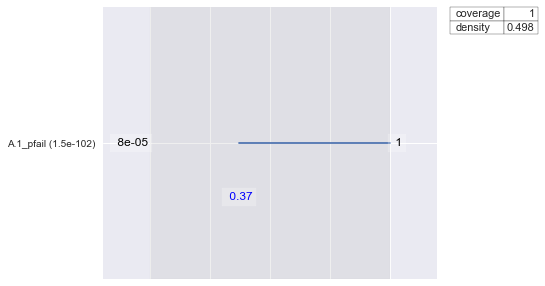

In [94]:
# Inspecting the selected box for a coverage and density above 80% - graph
box_damage_graph = box_damage.inspect(9, style='graph')
box_damage_graph.set_size_inches(6,5)
plt.show()

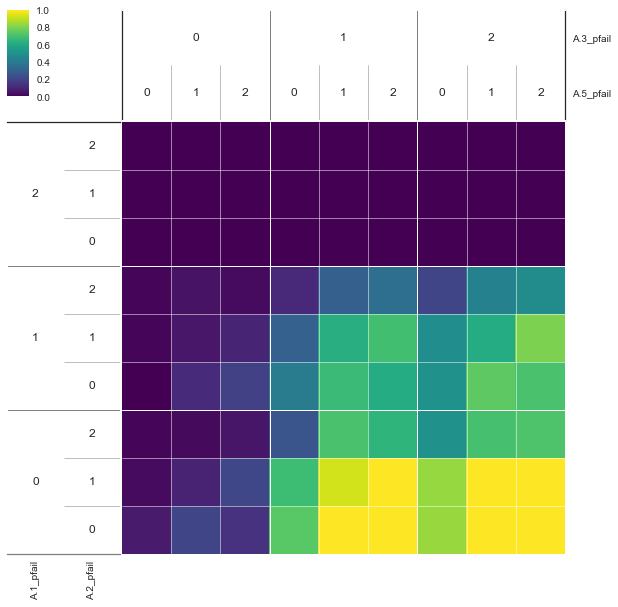

In [96]:
# Using dimensional stacking to check if the results of the scenario discovery give the same results
# The number of levels can be set on 2, since there are only 4 uncertainties that should be shown
from ema_workbench.analysis import dimensional_stacking

dimensional_stacking.create_pivot_plot(x,y, nr_levels=2)
plt.show()